In [48]:
import pandas as pd
import zipfile

In [49]:
with zipfile.ZipFile("crashes.csv.zip") as z1:
    with z1.open("crashes.csv") as crashes:
        df_crashes = pd.read_csv(crashes)

df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416872 entries, 0 to 416871
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                416872 non-null  object 
 1   RD_NO                          416813 non-null  object 
 2   CRASH_DATE_EST_I               31821 non-null   object 
 3   CRASH_DATE                     416868 non-null  object 
 4   POSTED_SPEED_LIMIT             416868 non-null  float64
 5   TRAFFIC_CONTROL_DEVICE         416868 non-null  object 
 6   DEVICE_CONDITION               416868 non-null  object 
 7   WEATHER_CONDITION              416868 non-null  object 
 8   LIGHTING_CONDITION             416868 non-null  object 
 9   FIRST_CRASH_TYPE               416867 non-null  object 
 10  TRAFFICWAY_TYPE                416867 non-null  object 
 11  LANE_CNT                       126015 non-null  float64
 12  ALIGNMENT                     

In [50]:
df_crashes = df_crashes.loc[df_crashes["WEATHER_CONDITION"] == 'RAIN']
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36006 entries, 12 to 416854
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                36006 non-null  object 
 1   RD_NO                          35999 non-null  object 
 2   CRASH_DATE_EST_I               2270 non-null   object 
 3   CRASH_DATE                     36006 non-null  object 
 4   POSTED_SPEED_LIMIT             36006 non-null  float64
 5   TRAFFIC_CONTROL_DEVICE         36006 non-null  object 
 6   DEVICE_CONDITION               36006 non-null  object 
 7   WEATHER_CONDITION              36006 non-null  object 
 8   LIGHTING_CONDITION             36006 non-null  object 
 9   FIRST_CRASH_TYPE               36006 non-null  object 
 10  TRAFFICWAY_TYPE                36006 non-null  object 
 11  LANE_CNT                       11627 non-null  float64
 12  ALIGNMENT                      36006 non-null  ob

## Feature Engineering

#### `MOST_SEVERE_INJURY` column

In [51]:
df_crashes["MOST_SEVERE_INJURY"].value_counts()

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     30036
NONINCAPACITATING INJURY     3280
REPORTED, NOT EVIDENT        1821
INCAPACITATING INJURY         716
FATAL                          41
Name: count, dtype: int64

In [4]:
df_crashes["MOST_SEVERE_INJURY"].isna().sum()

112

In [52]:
# Dropping null values from the target variable column
df_crashes = df_crashes.loc[df_crashes["MOST_SEVERE_INJURY"].notna()]
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35894 entries, 12 to 416854
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                35894 non-null  object 
 1   RD_NO                          35887 non-null  object 
 2   CRASH_DATE_EST_I               2248 non-null   object 
 3   CRASH_DATE                     35894 non-null  object 
 4   POSTED_SPEED_LIMIT             35894 non-null  float64
 5   TRAFFIC_CONTROL_DEVICE         35894 non-null  object 
 6   DEVICE_CONDITION               35894 non-null  object 
 7   WEATHER_CONDITION              35894 non-null  object 
 8   LIGHTING_CONDITION             35894 non-null  object 
 9   FIRST_CRASH_TYPE               35894 non-null  object 
 10  TRAFFICWAY_TYPE                35894 non-null  object 
 11  LANE_CNT                       11598 non-null  float64
 12  ALIGNMENT                      35894 non-null  ob

In [53]:
# Making most severe injury column binary
injury_binary = {'NO INDICATION OF INJURY': 0, 'NONINCAPACITATING INJURY': 1, 'REPORTED, NOT EVIDENT': 1, 'INCAPACITATING INJURY': 1, 'FATAL': 1}

df_crashes["INJURY_BINARY"] = df_crashes["MOST_SEVERE_INJURY"].map(injury_binary)
df_crashes["INJURY_BINARY"].value_counts()
# Worth noting that it is very imbalanced.

INJURY_BINARY
0    30036
1     5858
Name: count, dtype: int64

#### Selecting relavent columns for our analyses

For the first responders, we would like to evaluate the relationship between various factors in car crashes in Chicago and the injuries resulting from the car crashes. Largely, these factors include: **weather condition, time of the crashes, and severity of the damage to the car**.

In [54]:
col_names = ['LIGHTING_CONDITION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'MOST_SEVERE_INJURY', 'INJURY_BINARY']

df_crashes = df_crashes[col_names]
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35894 entries, 12 to 416854
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIGHTING_CONDITION  35894 non-null  object 
 1   CRASH_HOUR          35894 non-null  float64
 2   CRASH_DAY_OF_WEEK   35894 non-null  float64
 3   CRASH_MONTH         35894 non-null  float64
 4   MOST_SEVERE_INJURY  35894 non-null  object 
 5   INJURY_BINARY       35894 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.9+ MB


#### Checking for missing values

In [55]:
df_crashes.isna().sum()

LIGHTING_CONDITION    0
CRASH_HOUR            0
CRASH_DAY_OF_WEEK     0
CRASH_MONTH           0
MOST_SEVERE_INJURY    0
INJURY_BINARY         0
dtype: int64

## Looking at each column

In [191]:
# groupby for EDA
grouped_crashes_binary = df_crashes.groupby(['INJURY_BINARY'])

#### `LIGHTING_CONDITION`

In [192]:
df_crashes['LIGHTING_CONDITION'].value_counts()

LIGHTING_CONDITION
DAYLIGHT                  19727
DARKNESS, LIGHTED ROAD    10780
DARKNESS                   2455
DUSK                       1556
DAWN                        999
UNKNOWN                     377
Name: count, dtype: int64

#### `CRASH_HOUR`

In [32]:
df_crashes['CRASH_HOUR'].value_counts()

CRASH_HOUR
17.0    2600
16.0    2525
15.0    2379
18.0    2245
14.0    1929
13.0    1869
8.0     1867
19.0    1858
12.0    1772
7.0     1655
9.0     1646
20.0    1610
11.0    1588
10.0    1470
21.0    1463
22.0    1332
23.0    1125
6.0      963
0.0      848
1.0      789
2.0      663
5.0      606
3.0      568
4.0      524
Name: count, dtype: int64

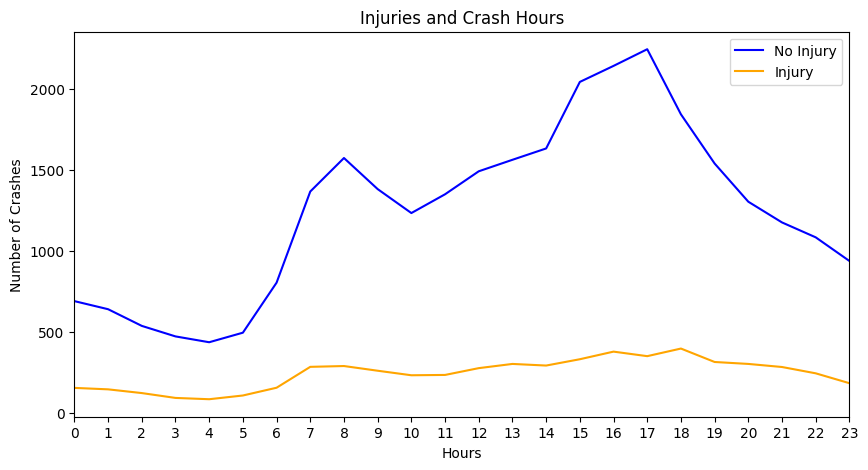

In [33]:
# A line graph of No Injury/Injury on Crash Hours
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
x_no_injury = grouped_crashes_binary.get_group(0)['CRASH_HOUR'].value_counts().sort_index().index
y_no_injury = grouped_crashes_binary.get_group(0)['CRASH_HOUR'].value_counts().sort_index().values
ax.plot(x_no_injury, y_no_injury, 'b', label='No Injury')

x_injury = grouped_crashes_binary.get_group(1)['CRASH_HOUR'].value_counts().sort_index().index
y_injury = grouped_crashes_binary.get_group(1)['CRASH_HOUR'].value_counts().sort_index().values
ax.plot(x_injury, y_injury, 'orange', label='Injury')

ax.set_title("Injuries and Crash Hours")
ax.set_xlabel("Hours")
ax.set_ylabel("Number of Crashes")
ax.set_xticks(range(0,25))
plt.margins(x=0)
ax.legend()

# Potentially, this may be interesting
# It seems more injuries resulting from car crashes occur between 3-5 pm
# Rather than night time or rush hour

#### `CRASH_DAY_OF_WEEK`

In [34]:
# Sunday is 1
df_crashes["CRASH_DAY_OF_WEEK"].value_counts()

CRASH_DAY_OF_WEEK
7.0    5993
6.0    5752
4.0    5552
3.0    4941
5.0    4813
2.0    4504
1.0    4339
Name: count, dtype: int64

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_1318/241389436.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])


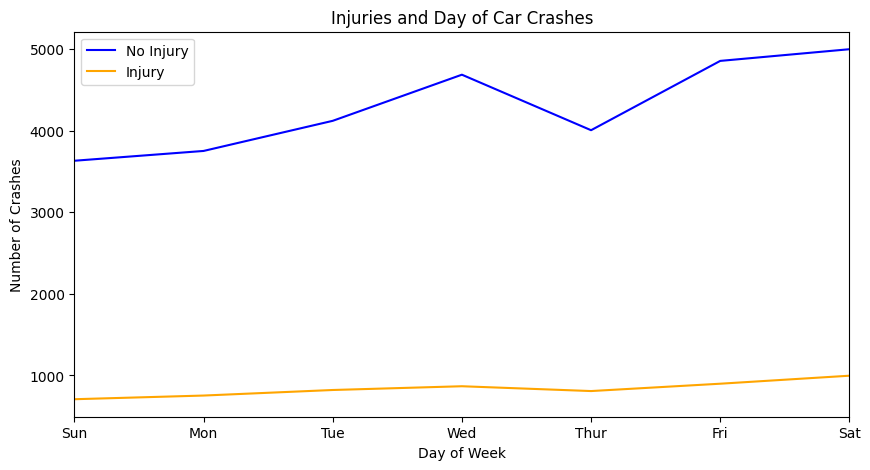

In [35]:
# A line graph on day of week
fig, ax = plt.subplots(figsize=(10,5))
x_no_injury = grouped_crashes_binary.get_group(0)['CRASH_DAY_OF_WEEK'].value_counts().sort_index().index
y_no_injury = grouped_crashes_binary.get_group(0)['CRASH_DAY_OF_WEEK'].value_counts().sort_index().values
ax.plot(x_no_injury, y_no_injury, 'b', label='No Injury')

x_injury = grouped_crashes_binary.get_group(1)['CRASH_DAY_OF_WEEK'].value_counts().sort_index().index
y_injury = grouped_crashes_binary.get_group(1)['CRASH_DAY_OF_WEEK'].value_counts().sort_index().values
ax.plot(x_injury, y_injury, 'orange', label='Injury')

ax.set_title("Injuries and Day of Car Crashes")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Number of Crashes")
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
plt.margins(x=0)
ax.legend()

# Nothing too noticable
# Slight peak on Friday and Saturday
# Visitors and tourists visiting from outside of the city may contribute to this slight increase

#### `CRASH_MONTH`

In [36]:
df_crashes["CRASH_MONTH"].value_counts()

CRASH_MONTH
10.0    6077
4.0     4002
5.0     3870
11.0    3616
3.0     2866
6.0     2816
9.0     2546
12.0    2515
8.0     2176
7.0     2073
1.0     1788
2.0     1549
Name: count, dtype: int64

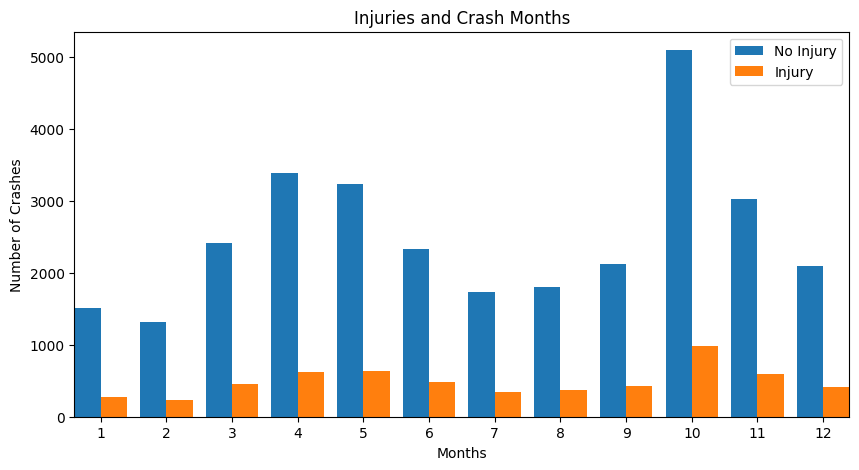

In [37]:
# A Grouped bar graph on No Injury/Injury and Crash Months

fig, ax = plt.subplots(figsize=(10,5))
x_no_injury = grouped_crashes_binary.get_group(0)['CRASH_MONTH'].value_counts().sort_index().index
y_no_injury = grouped_crashes_binary.get_group(0)['CRASH_MONTH'].value_counts().sort_index().values
ax.bar(x_no_injury -0.2, y_no_injury, 0.4, label='No Injury')

x_injury = grouped_crashes_binary.get_group(1)['CRASH_MONTH'].value_counts().sort_index().index
y_injury = grouped_crashes_binary.get_group(1)['CRASH_MONTH'].value_counts().sort_index().values
ax.bar(x_injury + 0.2, y_injury + 0.4, 0.4, label='Injury')

ax.set_xticks(range(1,13))

ax.set_title("Injuries and Crash Months")
ax.set_xlabel("Months")
ax.set_ylabel("Number of Crashes")

plt.margins(x=0)
ax.legend()

# I would have guessed more crashes during the winter months
# But there seems to be no dramatic differences between months

### Train Test Split

In [87]:
from sklearn.model_selection import train_test_split

X = df_crashes.drop(["INJURY_BINARY", "MOST_SEVERE_INJURY"], axis=1)
y = df_crashes.INJURY_BINARY
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [89]:
# OneHotEncoder to make categories numeric
# This seems necessary before doing SMOTE or DT
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['LIGHTING_CONDITION']

ohe = OneHotEncoder(drop='first')

X_train_encoded = pd.DataFrame (ohe.fit_transform(X_train[categorical_cols]).toarray(), columns=ohe.get_feature_names_out())
X_test_encoded = pd.DataFrame (ohe.transform(X_test[categorical_cols]).toarray(), columns=ohe.get_feature_names_out())



In [90]:
X_train_merge = X_train.drop(['LIGHTING_CONDITION'], axis=1)
X_train_merge.reset_index(drop=True, inplace=True)
X_test_merge = X_test.drop(['LIGHTING_CONDITION'], axis=1)
X_test_merge.reset_index(drop=True, inplace=True)

In [91]:
X_train_encoded = pd.concat([X_train_encoded, X_train_merge], axis=1)
X_test_encoded = pd.concat([X_test_encoded, X_test_merge], axis=1)

In [92]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

# Binary Classification Models

### Attempt to run Dummy Classifier Model

Baseline model to pick the most frequent category. Good to compare with other models later on.

In [12]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_resampled, y_resampled)

y_pred_dummy_clf = dummy_clf.predict(X_test_encoded)


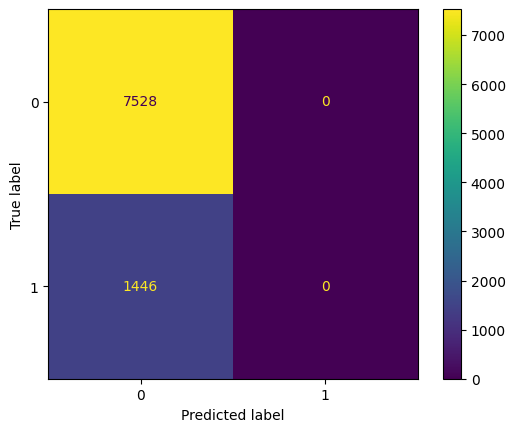

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_dummy_clf = confusion_matrix(y_test, y_pred_dummy_clf)
disp = ConfusionMatrixDisplay(cm_dummy_clf)
disp.plot()

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

dummy_clf_accuracy = accuracy_score(y_test, y_pred_dummy_clf)
dummy_clf_accuracy

0.8388678404279029

In [15]:
dummy_clf_recall = recall_score(y_test, y_pred_dummy_clf)
dummy_clf_recall

0.0

### Attempt to run Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_resampled, y_resampled)


DecisionTreeClassifier(max_depth=5)

In [17]:
y_pred = dt.predict(X_test_encoded)

# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# f, ax = plt.subplots(figsize=(100,100))
# plot_tree(dt, ax=ax)

In [18]:
ohe.get_feature_names_out()[0]
# This is the very first feature, which is the most influencial for our model

'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD'

In [19]:
feature_imp = {}
for fi, feature in zip(dt.feature_importances_, dt.feature_names_in_):
    feature_imp[feature] = fi

feature_imp

# This confirms the most important feature is what was shown above

{'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD': 0.41618632133534716,
 'LIGHTING_CONDITION_DAWN': 0.0,
 'LIGHTING_CONDITION_DAYLIGHT': 0.21210579899955118,
 'LIGHTING_CONDITION_DUSK': 0.11492998199466116,
 'LIGHTING_CONDITION_UNKNOWN': 0.04238007232671679,
 'CRASH_HOUR_1.0': 0.0,
 'CRASH_HOUR_2.0': 0.0,
 'CRASH_HOUR_3.0': 0.0,
 'CRASH_HOUR_4.0': 0.01896487941680572,
 'CRASH_HOUR_5.0': 0.0,
 'CRASH_HOUR_6.0': 0.0,
 'CRASH_HOUR_7.0': 0.0,
 'CRASH_HOUR_8.0': 0.0,
 'CRASH_HOUR_9.0': 0.0,
 'CRASH_HOUR_10.0': 0.0,
 'CRASH_HOUR_11.0': 0.0,
 'CRASH_HOUR_12.0': 0.0,
 'CRASH_HOUR_13.0': 0.0,
 'CRASH_HOUR_14.0': 0.0,
 'CRASH_HOUR_15.0': 0.0,
 'CRASH_HOUR_16.0': 0.04294870193131198,
 'CRASH_HOUR_17.0': 0.07535496974500569,
 'CRASH_HOUR_18.0': 0.0,
 'CRASH_HOUR_19.0': 0.0,
 'CRASH_HOUR_20.0': 0.0,
 'CRASH_HOUR_21.0': 0.0,
 'CRASH_HOUR_22.0': 0.0,
 'CRASH_HOUR_23.0': 0.0,
 'CRASH_DAY_OF_WEEK_2.0': 0.0,
 'CRASH_DAY_OF_WEEK_3.0': 0.0,
 'CRASH_DAY_OF_WEEK_4.0': 0.024735719403934573,
 'CRASH_DAY_OF_WEEK_5.

In [21]:
y_pred_dt = dt.predict(X_test_encoded)
y_train_pred_dt = dt.predict(X_train_encoded)

dt_train_accuracy = accuracy_score(y_train, y_train_pred_dt)
dt_train_accuracy


0.6571693907875186

In [22]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_accuracy

0.6605749944283485

In [23]:
dt_train_recall = recall_score(y_train, y_train_pred_dt)
dt_train_recall

0.3372620126926564

In [24]:
dt_recall = recall_score(y_test, y_pred_dt)
dt_recall

0.3243430152143845

# Multinomial Classification Models

#### Attempt to run Decision Tree again, with multiclass target variable

In [93]:
y2 = df_crashes.MOST_SEVERE_INJURY

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y2, random_state=42)

In [94]:
categorical_cols = ['LIGHTING_CONDITION']

ohe = OneHotEncoder(drop='first')

X_train_encoded_2 = pd.DataFrame (ohe.fit_transform(X_train_2[categorical_cols]).toarray(), columns=ohe.get_feature_names_out())
X_test_encoded_2 = pd.DataFrame (ohe.transform(X_test_2[categorical_cols]).toarray(), columns=ohe.get_feature_names_out())

In [95]:
X_train_merge_2 = X_train_2.drop(['LIGHTING_CONDITION'], axis=1)
X_train_merge_2.reset_index(drop=True, inplace=True)
X_test_merge_2 = X_test_2.drop(['LIGHTING_CONDITION'], axis=1)
X_test_merge_2.reset_index(drop=True, inplace=True)

In [96]:
X_train_encoded_2 = pd.concat([X_train_encoded_2, X_train_merge_2], axis=1)
X_test_encoded_2 = pd.concat([X_test_encoded_2, X_test_merge_2], axis=1)

In [98]:
smote_2 = SMOTE()
X_resampled_2, y_resampled_2 = smote_2.fit_resample(X_train_encoded_2, y_train_2)

### Dummy Classifier

In [99]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_resampled_2, y_resampled_2)

y_pred_dummy_clf = dummy_clf.predict(X_test_encoded_2)

In [100]:
from sklearn.metrics import classification_report

report = classification_report(y_test_2, y_pred_dummy_clf)
print(report)

                          precision    recall  f1-score   support

                   FATAL       0.00      1.00      0.00         8
   INCAPACITATING INJURY       0.00      0.00      0.00       178
 NO INDICATION OF INJURY       0.00      0.00      0.00      7528
NONINCAPACITATING INJURY       0.00      0.00      0.00       790
   REPORTED, NOT EVIDENT       0.00      0.00      0.00       470

                accuracy                           0.00      8974
               macro avg       0.00      0.20      0.00      8974
            weighted avg       0.00      0.00      0.00      8974



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [101]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

dummy_clf_accuracy = accuracy_score(y_test_2, y_pred_dummy_clf)
dummy_clf_accuracy

0.0008914642299977714

In [102]:
dummy_clf_recall = recall_score(y_test_2, y_pred_dummy_clf, average='weighted')
dummy_clf_recall

0.0008914642299977714

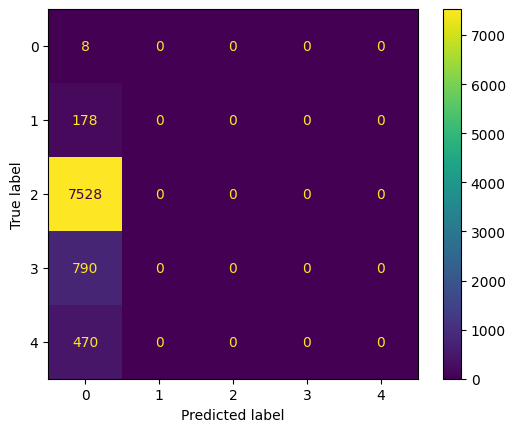

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_dummy_clf = confusion_matrix(y_test_2, y_pred_dummy_clf)
disp = ConfusionMatrixDisplay(cm_dummy_clf)
disp.plot()

### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt_2 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_2.fit(X_resampled_2, y_resampled_2)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [116]:
y_pred_2 = dt_2.predict(X_test_encoded_2)

# f, ax = plt.subplots(figsize=(150,150))
# plot_tree(dt_2, ax=ax)

In [117]:
feature_imp_2 = {}
for fi, feature in zip(dt_2.feature_importances_, dt_2.feature_names_in_):
    # feature_imp[feature] = fi
    print(fi, feature)


0.08520885675613511 LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD
0.01559235411551595 LIGHTING_CONDITION_DAWN
0.05821783152667159 LIGHTING_CONDITION_DAYLIGHT
0.020792975370937928 LIGHTING_CONDITION_DUSK
0.007381280346844585 LIGHTING_CONDITION_UNKNOWN
0.2792034865418492 CRASH_HOUR
0.20599009273227545 CRASH_DAY_OF_WEEK
0.32761312260977016 CRASH_MONTH


In [118]:
dt_accuracy_2 = accuracy_score(y_test_2, y_pred_2)
dt_accuracy_2

0.3906841987965233

In [119]:
dt_recall_2 = recall_score(y_test_2, y_pred_2, average='weighted')
dt_recall_2

0.3906841987965233

In [120]:
from sklearn.metrics import classification_report

report = classification_report(y_test_2, y_pred_2)
print(report)

                          precision    recall  f1-score   support

                   FATAL       0.00      0.12      0.00         8
   INCAPACITATING INJURY       0.02      0.08      0.03       178
 NO INDICATION OF INJURY       0.85      0.42      0.56      7528
NONINCAPACITATING INJURY       0.11      0.18      0.14       790
   REPORTED, NOT EVIDENT       0.06      0.35      0.10       470

                accuracy                           0.39      8974
               macro avg       0.21      0.23      0.17      8974
            weighted avg       0.73      0.39      0.49      8974



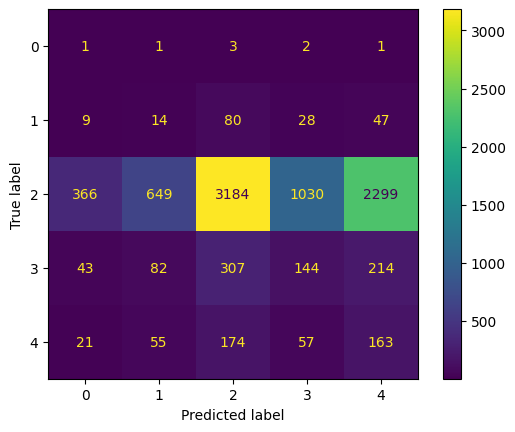

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_2, y_pred_2)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

#### Logistic Regression Model

Here, the `MOST_SEVERE_INJURY` column is used instead of `INJURY_BINARY` to make the model multiclass classification. This includes all predictors.

In [122]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42,multi_class='multinomial')
logreg.fit(X_resampled_2, y_resampled_2)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [123]:
logreg.score(X_resampled_2, y_resampled_2)
# This is accuracy

0.2830015994313133

In [124]:
logreg.score(X_test_encoded_2, y_test_2)


0.11076443057722309

In [127]:
from sklearn.metrics import log_loss
log_loss(y_resampled_2, logreg.predict_proba(X_resampled_2))

1.576599277354161

In [128]:
log_loss(y_test_2, logreg.predict_proba(X_test_encoded_2))
# lower is better


1.5856571399768074

In [129]:
coef = logreg.coef_
coef

array([[-2.75021265e-02, -1.10678072e+00, -7.93111369e-01,
         1.56800959e-01, -3.45281935e-01, -2.66209491e-02,
         4.21760272e-02, -7.12018499e-02],
       [ 2.77571022e-01, -5.50378408e-02,  2.18978535e-01,
         2.32233338e-02,  1.33468755e-01, -4.79098932e-03,
         2.25805282e-02,  1.84304626e-02],
       [-3.98798476e-01,  6.06737680e-01, -4.96455418e-02,
        -1.26458315e-01,  4.72687330e-01,  6.48642061e-03,
        -1.74362405e-02,  1.37381281e-02],
       [ 9.95042066e-04,  4.65140916e-01,  8.27171332e-02,
        -2.29833121e-01, -1.63282783e-01,  1.12304876e-02,
        -3.17610550e-02,  2.14232050e-02],
       [ 1.47734538e-01,  8.99399653e-02,  5.41061242e-01,
         1.76267144e-01, -9.75913666e-02,  1.36950302e-02,
        -1.55592599e-02,  1.76100543e-02]])

In [132]:
y_pred_logreg_2 = logreg.predict(X_test_encoded_2)
logreg_accuracy = accuracy_score(y_test_2, y_pred_logreg_2)
logreg_accuracy

0.11076443057722309

In [133]:
model_recall = recall_score(y_test_2, y_pred_logreg_2, average='weighted')
model_recall

0.11076443057722309

In [134]:
report = classification_report(y_test_2, y_pred_logreg_2)
print(report)

                          precision    recall  f1-score   support

                   FATAL       0.00      0.62      0.00         8
   INCAPACITATING INJURY       0.03      0.11      0.04       178
 NO INDICATION OF INJURY       0.84      0.09      0.16      7528
NONINCAPACITATING INJURY       0.11      0.07      0.08       790
   REPORTED, NOT EVIDENT       0.06      0.56      0.10       470

                accuracy                           0.11      8974
               macro avg       0.21      0.29      0.08      8974
            weighted avg       0.72      0.11      0.15      8974



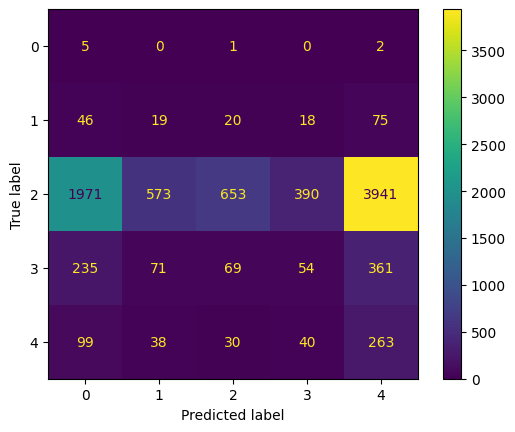

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_2, y_pred_logreg_2)
disp=ConfusionMatrixDisplay(cm)
disp.plot()